<a href="https://colab.research.google.com/github/ruchiraravishankar/level-5-project/blob/main/transfer_learning_on_writer_150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import os
import pickle

In [2]:
b_file = open("/content/drive/MyDrive/iam_dataset/d_i.pkl", "rb")
d_i = pickle.load(b_file)
print(d_i)

{'e01-062': '213', 'e01-059': '213', 'e01-086': '214', 'e01-092': '215', 'e01-102': '215', 'e01-113': '216', 'e01-107': '216', 'e02-014': '219', 'e01-119': '217', 'e02-000': '218', 'e02-018': '220', 'e02-021': '221', 'e02-025': '222', 'e02-074': '223', 'e02-082': '224', 'e02-086': '225', 'e02-091': '226', 'e02-094': '227', 'e02-100': '228', 'e02-117': '229', 'e04-000': '158', 'e04-008': '230', 'e04-011': '231', 'e04-004': '230', 'e04-015': '231', 'e04-022': '232', 'e04-019': '232', 'e04-026': '233', 'e04-030': '233', 'e04-038': '234', 'e04-034': '234', 'e04-052': '235', 'e04-043': '235', 'e04-058': '236', 'e04-062': '237', 'e04-079': '238', 'e04-068': '237', 'e04-083': '239', 'e04-086': '240', 'e04-091': '241', 'e04-095': '241', 'e04-109': '242', 'e04-103': '242', 'e04-099': '241', 'e04-114': '242', 'e04-119': '243', 'e04-124': '243', 'e04-127': '243', 'e04-132': '241', 'e06-000': '206', 'e06-006': '202', 'e06-003': '204', 'e06-021': '206', 'e06-010': '203', 'e06-015': '204', 'e06-030'

In [3]:
import os
import glob
import shutil
data_path = '/content/drive/MyDrive/iam_dataset/'
# Create temp directory to save writers' forms in (assumes files have already been copied if the directory exists)
temp_sentences_path = data_path + "/temp_sentences"
img_files = np.zeros((0), dtype=str)
print(img_files)
img_targets = np.zeros((0), dtype=str)
print(img_targets)
sentence_dict = {}
path_to_files = os.path.join(temp_sentences_path, '*')
for file_path in glob.glob(path_to_files):
    img_files = np.append(img_files, file_path)
    file_name, _ = os.path.splitext(file_path.split('/')[-1]  )
    form_id = '-'.join(file_name.split('-')[0:2])
    for key in d_i:
        if key == form_id:
            img_targets = np.append(img_targets, d_i[form_id])

[]
[]


In [4]:
from collections import Counter
print(img_files.shape)
print(img_targets.shape)

print(Counter(img_targets).keys())
print(Counter(img_targets).values())

(4901,)
(4901,)
dict_keys(['551', '552', '567', '315', '588', '634', '635', '670', '671', '340', '339', '341', '342', '343', '344', '345', '346', '347', '348', '332', '333', '334', '335', '336', '337', '338', '349', '274', '118', '384', '415', '247', '248', '273', '150', '151', '152', '153', '154', '155', '202', '203', '204', '205', '206', '207', '208', '209', '085', '000'])
dict_values([129, 127, 87, 73, 133, 134, 95, 116, 129, 83, 91, 101, 95, 81, 99, 107, 105, 86, 87, 82, 104, 89, 71, 82, 75, 80, 84, 45, 52, 117, 87, 60, 54, 45, 104, 99, 101, 111, 108, 95, 63, 43, 60, 55, 50, 56, 53, 71, 54, 693])


(47, 95)
(80, 1203)


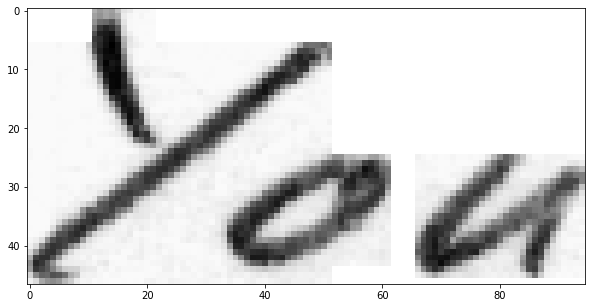

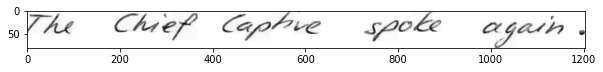

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for file_name in img_files[:2]:
    img = mpimg.imread(file_name)
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap ='gray')
    print(img.shape)

In [6]:
labelled_data = np.stack([img_files, img_targets], axis=1)

print(labelled_data.shape)

(4901, 2)


In [7]:
from sklearn.utils import shuffle
from PIL import Image
import random

CROP_SIZE = 113
NUM_LABELS = 50

def get_augmented_sample(sample, label, sample_ratio):
    # Get current image details
    img = Image.open(sample)
    img_width = img.size[0]
    img_height = img.size[1]

    # Compute resize dimensions such that aspect ratio is maintained
    height_fac = CROP_SIZE / img_height
    size = (int(img_width * height_fac), CROP_SIZE)

    # Resize image 
    new_img = img.resize((size), Image.ANTIALIAS)
    new_img_width = new_img.size[0]
    new_img_height = new_img.size[1]

    # Generate a random number of crops of size 113x113 from the resized image
    x_coord = list(range(0, new_img_width - CROP_SIZE))
    num_crops = int(len(x_coord) * sample_ratio)
    random_x_coord = random.sample(x_coord, num_crops)
    
    # Create augmented images (cropped forms) and map them to a label (writer)
    images = []
    labels = []
    for x in random_x_coord:
        img_crop = new_img.crop((x, 0, x + CROP_SIZE, CROP_SIZE))
        # Transform image to an array of numbers
        images.append(np.asarray(img_crop))
        labels.append(label)

    return images, labels

In [8]:
labelled_data_150 = labelled_data[labelled_data[:,1] == '150']

print(labelled_data_150.shape)

labelled_data_150 = labelled_data_150[:98]
print(labelled_data_150.shape)

print(np.unique(labelled_data_150[:,1]))

(104, 2)
(98, 2)
['150']


In [11]:
remove_150 = labelled_data[labelled_data[:,1]!='150']
remove_150 = remove_150[remove_150[:,1]!='000']
print(np.unique(remove_150[:,1]))
print(np.unique(remove_150[:,1]).shape)

['085' '118' '151' '152' '153' '154' '155' '202' '203' '204' '205' '206'
 '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334' '335'
 '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346' '347'
 '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670' '671']
(48,)


In [12]:
y = [remove_150[remove_150[:,1]==k] for k in np.unique(remove_150[:,1])]
print(len(y))

48


In [13]:
labelled_data_1 = []
for i in y:
    labelled_data_1.append(i[:2])
print(len(labelled_data_1))

labelled_data_1 = np.array(labelled_data_1)

print(labelled_data_1.shape)

48
(48, 2, 2)


In [14]:
labelled_data_1=labelled_data_1.reshape(-1,2)

In [15]:
print(np.unique(labelled_data_1[:,1]))

['085' '118' '151' '152' '153' '154' '155' '202' '203' '204' '205' '206'
 '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334' '335'
 '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346' '347'
 '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670' '671']


In [16]:
labelled_data_new = np.concatenate((labelled_data_150, labelled_data_1))
np.random.shuffle(labelled_data_new)
print(labelled_data_new.shape) # mix of sentences from writer id 0 and others, labelled

(194, 2)


In [17]:
def augment(data, labels):
    augmented_sample_list = []
    augmented_label_list = []
    for i in range(len(data)):
        augmented_samples, augmented_labels = get_augmented_sample(data[i], labels[i],0.05)
        augmented_sample_list.append(augmented_samples)
        augmented_label_list.append(augmented_labels)
    return augmented_sample_list, augmented_label_list

In [18]:
# split before augmenting to ensure the sentences are being split and not the augmented samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(labelled_data_new[:,0], labelled_data_new[:,1], test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(129,) (65,) (129,) (65,)


In [19]:
augsamps, auglbls = augment(X_train, y_train) # returns two lists of arrays
ausamps_test, auglbls_test = augment(X_test, y_test)

In [20]:
import operator
from functools import reduce

# flattening the lists
aug_samps = reduce(operator.add, augsamps)
aug_lbls = reduce(operator.add, auglbls)

aug_samps_test = reduce(operator.add, ausamps_test)
aug_lbls_test = reduce(operator.add, auglbls_test)
print(len(aug_samps))
print(len(aug_lbls))

print(len(aug_samps_test))
print(len(aug_lbls_test))

8146
8146
3717
3717


In [21]:
# converting lists to arrays
aug_samps_arr = np.array(aug_samps)
aug_lbls_arr = np.array(aug_lbls)
aug_samps_arr_test = np.array(aug_samps_test)
aug_lbls_arr_test = np.array(aug_lbls_test)

print(aug_samps_arr.shape)
print(aug_lbls_arr.shape)
print(aug_samps_arr_test.shape)
print(aug_lbls_arr_test.shape)

(8146, 113, 113)
(8146,)
(3717, 113, 113)
(3717,)


In [22]:
X_train = aug_samps_arr
X_train = X_train.reshape(X_train.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_train = X_train.astype('float16')
# X_data /= 255
X_train /= 255.0
y_train = aug_lbls_arr

X_test = aug_samps_arr_test
X_test = X_test.reshape(X_test.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_test = X_test.astype('float16')
X_test /= 255.0
y_test = aug_lbls_arr_test

In [23]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(8146, 1, 113, 113)
(8146,)
(3717, 1, 113, 113)
(3717,)


In [24]:
new = np.unique(y_train)
print(new)

y_train[y_train !='150'] = 1
new = np.unique(y_train)
print(new)

y_train[y_train=='150'] = 0 # 0 is 150
new = np.unique(y_train)
print(new)

print(y_train.shape)

y_train = y_train.astype('float16')

print(np.unique(y_train))

['085' '118' '150' '152' '153' '154' '155' '202' '203' '205' '206' '207'
 '208' '209' '247' '248' '274' '315' '333' '334' '335' '338' '339' '340'
 '341' '342' '343' '344' '345' '347' '349' '384' '415' '551' '552' '567'
 '588' '634' '671']
['1' '150']
['0' '1']
(8146,)
[0. 1.]


In [25]:
new = np.unique(y_test)
print(new)

y_test[y_test !='000'] = 1
new = np.unique(y_test)
print(new)

y_test[y_test=='000'] = 0
new = np.unique(y_test)
print(new)

print(y_test.shape)

y_test = y_test.astype('float16')

print(np.unique(y_test))

['118' '150' '151' '153' '155' '202' '203' '204' '205' '206' '273' '274'
 '315' '332' '335' '336' '337' '340' '341' '342' '343' '344' '345' '346'
 '348' '384' '415' '551' '567' '634' '635' '670']
['1']
['1']
(3717,)
[1.]


In [26]:
torch.manual_seed(42)
CUDA = torch.cuda.is_available()
device = torch.device('cuda' if CUDA else 'cpu')
kwargs = {'num_workers': 1, 'pin_memory': True} if CUDA else {}
device

device(type='cuda')

In [27]:
from torch.utils.data import TensorDataset, DataLoader


tensor_x_train = torch.Tensor(X_train).type(torch.cuda.FloatTensor) # transform to torch tensor
tensor_y_train = torch.Tensor(y_train).type(torch.cuda.FloatTensor).long()

# tensor_x_train = torch.Tensor(X_train) # transform to torch tensor
# tensor_y_train = torch.Tensor(y_train).long()

train_dataset = TensorDataset(tensor_x_train,tensor_y_train) # create your datset
train_dataloader = DataLoader(train_dataset,batch_size=64, shuffle=True, drop_last=True) # create your dataloader

In [28]:
tensor_x_test = torch.Tensor(X_test).type(torch.cuda.FloatTensor) # transform to torch tensor
tensor_y_test = torch.Tensor(y_test).long().type(torch.cuda.FloatTensor).long()

# tensor_x_test = torch.Tensor(X_test) # transform to torch tensor
# tensor_y_test = torch.Tensor(y_test).long()

test_dataset = TensorDataset(tensor_x_test,tensor_y_test) # create your datset
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, drop_last=True) # create your dataloader

In [29]:
from torch import nn
class Binary_Classifier(nn.Module): 
    def __init__(self):
        super(Binary_Classifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(13520, 1024)
        self.fc2 = nn.Linear(1024, 2)
        self.relu = nn.ReLU()
        self.max_pool2d = nn.MaxPool2d(2)
    def forward(self, x):
        x = self.relu(self.max_pool2d(self.conv1(x)))
        x = self.relu(self.max_pool2d(self.conv2_drop(self.conv2(x))))
        x = x.view(x.shape[0],-1)
        # print(x.shape)
        x = self.relu(self.fc1(x))
        x = self.conv2_drop(x)
        x = self.fc2(x)
        return x

In [30]:
model=Binary_Classifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

print(next(model.parameters()).device)

cuda:0


In [31]:
for param in model.parameters():
  param.requires_grad = False

In [32]:
for param in model.conv2.parameters():
  param.requires_grad = True

In [33]:
for param in model.parameters():
  print(param.requires_grad)

False
False
True
True
False
False
False
False


In [34]:
num_ftrs = model.fc2.in_features
model.fc2 = nn.Linear(num_ftrs, 2).to(device)

In [35]:
train_losses = []
train_loss_record = []

In [36]:
if os.path.exists(os.getcwd()+'/model_no_150.pt'):
    print('Loading checkpoint: %s' % os.getcwd()+'/model_no_150.pt')
    path = torch.load(os.getcwd()+'/model_no_150.pt')
    epoch = path['epoch']
    model.load_state_dict(path['model'])
    optimizer.load_state_dict(path['optimizer'])

In [37]:
print(next(model.parameters()).device)

print(device)

cuda:0
cuda


In [38]:
from datetime import datetime
train_log_string = '%s :: Epoch %i :: Iter %i / %i :: train loss: %0.4f'
def train(epoch):
    print('Start Epoch {} Training...'.format(epoch))
    model.train()
    train_loss = []
    train_loss_sum = []
    for idx, (data, target) in enumerate(train_dataloader):
        # data = data.to(device)
        # target = target.to(device)
        optimizer.zero_grad()
        #  forward-pass
        output = model(data)
        loss = criterion(output, target)
        #backward-pass
        loss.backward()
        # Update the parameters
        optimizer.step()
        train_loss.append(loss.data.cpu().numpy())
        train_loss_sum.append(loss)
        if ((idx +1) % 5000) == 0:
          print(train_log_string % (datetime.now(), epoch, idx + 1, len(train_dataloader), np.mean(train_loss)))
          train_loss = []
    mean_tr = torch.mean(torch.stack(train_loss_sum))
    print('Train Loss at epoch {}: {}\n'.format(epoch, mean_tr))
    train_loss_record.append(mean_tr)
    return train_loss_record

In [39]:
for epoch in range(10):
    tlr = train(epoch)

Start Epoch 0 Training...
Train Loss at epoch 0: 0.6836702823638916

Start Epoch 1 Training...
Train Loss at epoch 1: 0.6845625042915344

Start Epoch 2 Training...
Train Loss at epoch 2: 0.683891236782074

Start Epoch 3 Training...
Train Loss at epoch 3: 0.6831363439559937

Start Epoch 4 Training...
Train Loss at epoch 4: 0.682754635810852

Start Epoch 5 Training...
Train Loss at epoch 5: 0.682744562625885

Start Epoch 6 Training...
Train Loss at epoch 6: 0.6814087629318237

Start Epoch 7 Training...
Train Loss at epoch 7: 0.6823075413703918

Start Epoch 8 Training...
Train Loss at epoch 8: 0.6788044571876526

Start Epoch 9 Training...
Train Loss at epoch 9: 0.6804521679878235



In [40]:
result = []
prediction = []
model.eval()
with torch.no_grad():
    for idx, (data, target) in enumerate(test_dataloader):
        # data = data.to(device)
        # target = target.to(device)
        # cuda_check = data.is_cuda
        # if cuda_check:
        #   get_cuda_device = data.get_device()
          # print(">>", get_cuda_device)
        output = model(data)
        output_sm = nn.Softmax(dim=1)(output)
        _, predicted = torch.max(output, 1)
        prediction.append(predicted)
        result.append(output_sm)
        
result = torch.stack(result).detach().cpu().numpy()
prediction = torch.stack(prediction).detach().cpu().numpy()

print(result.shape, prediction.shape)

(58, 64, 2) (58, 64)


In [41]:
print(prediction.reshape(-1).shape)

(3712,)


In [43]:
# if not os.path.exists('/content/drive/MyDrive/iam_dataset/saved_model/transf'):
  # os.makedirs('/content/drive/MyDrive/iam_dataset/saved_model/transf')

In [44]:
import pandas as pd
res = pd.DataFrame(result.reshape(-1,2))
pred = pd.DataFrame(prediction.reshape(-1))

# res.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/transf/results.csv", header=False, index=False)
# pred.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/transf/pred.csv", header=False, index=False)

In [45]:
print(res.shape, pred.shape)

y_test_new = y_train[:result.reshape(-1,2).shape[0]]

print(y_test_new.shape)

(3712, 2) (3712, 1)
(3712,)


In [46]:
result_df = pd.DataFrame({'ground truth': y_test_new, 'NN output': prediction.reshape(-1), 'probs 0': res[0], 'probs 1': res[1]})
result_df

ground truth  NN output   probs 0   probs 1
0              0.0          0  0.546430  0.453570
1              0.0          0  0.549746  0.450254
2              0.0          0  0.555354  0.444646
3              0.0          0  0.554942  0.445058
4              0.0          0  0.553679  0.446321
...            ...        ...       ...       ...
3707           1.0          0  0.548844  0.451156
3708           1.0          0  0.545133  0.454867
3709           1.0          0  0.545088  0.454913
3710           1.0          0  0.562729  0.437271
3711           1.0          0  0.553239  0.446761

[3712 rows x 4 columns]

In [47]:
# work out the accuracy and other metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual = result_df['ground truth']
predicted = result_df['NN output']
# confusion matrix
matrix = confusion_matrix(actual, predicted, labels=[0,1])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix_2 = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix_2)

Confusion matrix : 
 [[2379    0]
 [1333    0]]
Outcome values : 
 2379 0 1333 0
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1333
           0       0.64      1.00      0.78      2379

    accuracy                           0.64      3712
   macro avg       0.32      0.50      0.39      3712
weighted avg       0.41      0.64      0.50      3712



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


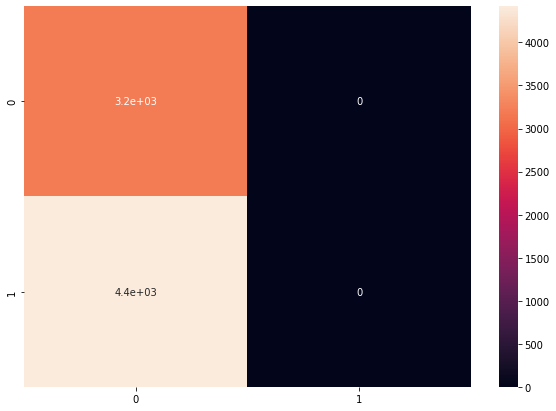

In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
matrix = classification_report(actual,predicted,labels=[0,1], output_dict=True)
print('Classification report : \n',matrix)
accuracy_score(actual, predicted)

Classification report : 
 {'0': {'precision': 0.41964285714285715, 'recall': 1.0, 'f1-score': 0.5911949685534591, 'support': 3196}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4420}, 'accuracy': 0.41964285714285715, 'macro avg': {'precision': 0.20982142857142858, 'recall': 0.5, 'f1-score': 0.29559748427672955, 'support': 7616}, 'weighted avg': {'precision': 0.17610012755102042, 'recall': 0.41964285714285715, 'f1-score': 0.24809074573225515, 'support': 7616}}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.41964285714285715

In [ ]:
matrix_df = pd.DataFrame(matrix).transpose()

matrix_df.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/transf/classification_report_1_2.csv", header=False, index=False)

# pd.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/classification_report.txt",matrix)
